In [ ]:
import pandas as pd               #for working and manipulating dataset
import numpy as np                #for numerical calculation of data
import matplotlib.pyplot as plt   #for ploting ghraphs and visual represntation of data
import seaborn as sns
from scipy.stats import norm      # for normalazation of our data
from sklearn.preprocessing import StandardScaler #for standarazatin of your data
from scipy import stats

In [ ]:
df=pd.read_csv("/content/Diwali_sales.csv")

In [ ]:
df.shape

(11251, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [ ]:
df.isnull().sum()   # check the null values

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [ ]:
df.drop(["Status","unnamed1"],axis=1,inplace=True)    #droping unrelated/blank columns

In [ ]:
df.dropna(inplace=True)  #drop null values

In [ ]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [ ]:
df["Amount"]=df["Amount"].astype('int')     #change the datatype

In [ ]:
df["Amount"].dtypes

dtype('int64')

In [ ]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [ ]:
df[["Age","Orders","Amount"]].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


In [ ]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='Gender', ylabel='count'>

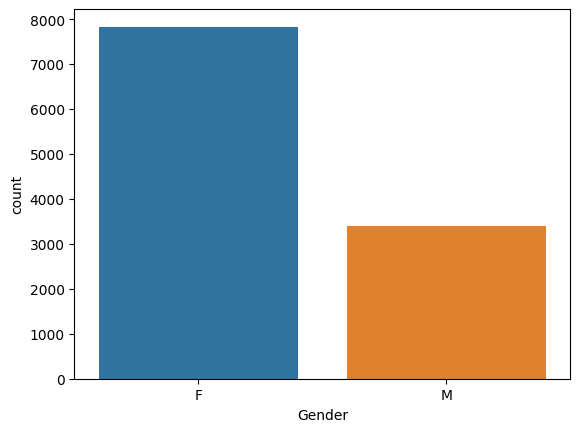

In [ ]:
sns.countplot(x="Gender",data=df)

<Axes: xlabel='Gender', ylabel='Amount'>

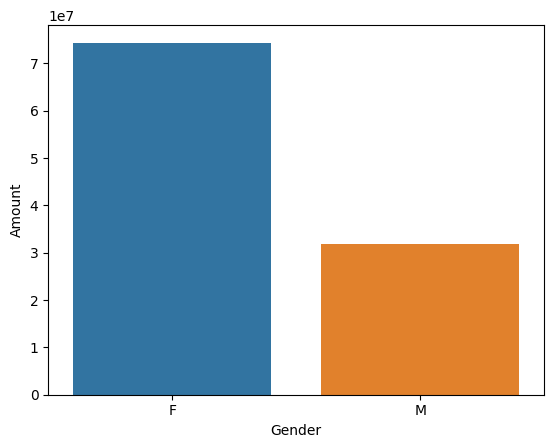

In [ ]:
sales_gen=df.groupby(["Gender"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)
sns.barplot(x="Gender",y="Amount",data=sales_gen)


In [ ]:
#1)(From above graph we can see that most of the buyers are females and the purchasing power of females are greater than men)

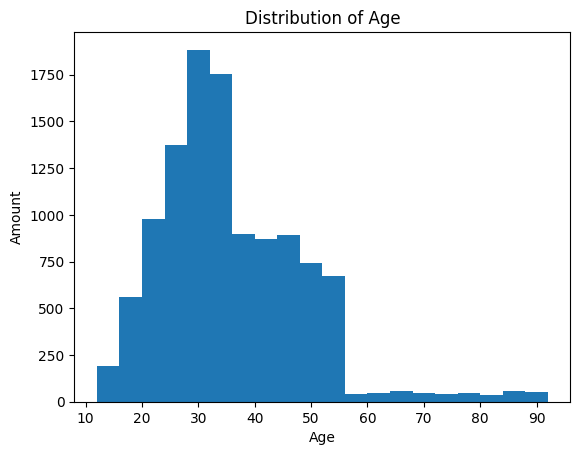

In [ ]:
plt.hist(df['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Amount')
plt.title('Distribution of Age')
plt.show()

<Axes: xlabel='Age Group', ylabel='count'>

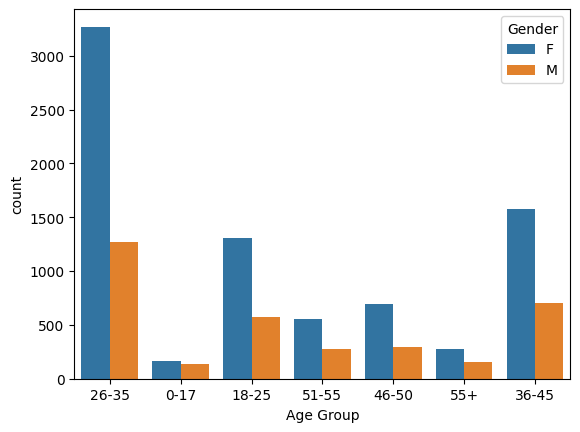

In [ ]:
sns.countplot(x="Age Group",data=df,hue="Gender")

<Axes: xlabel='Age Group', ylabel='Amount'>

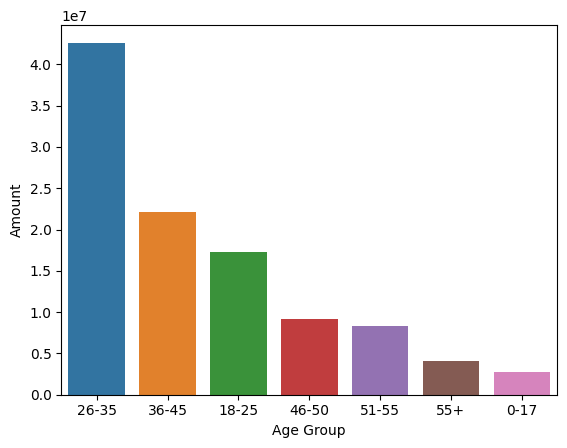

In [ ]:
sales_gen=df.groupby(["Age Group"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)
sns.barplot(x="Age Group",y="Amount",data=sales_gen)

In [ ]:
#2)(From above graph we can see that most of the buyers are of age group between 26-35 yrs female)

<Axes: xlabel='State', ylabel='Orders'>

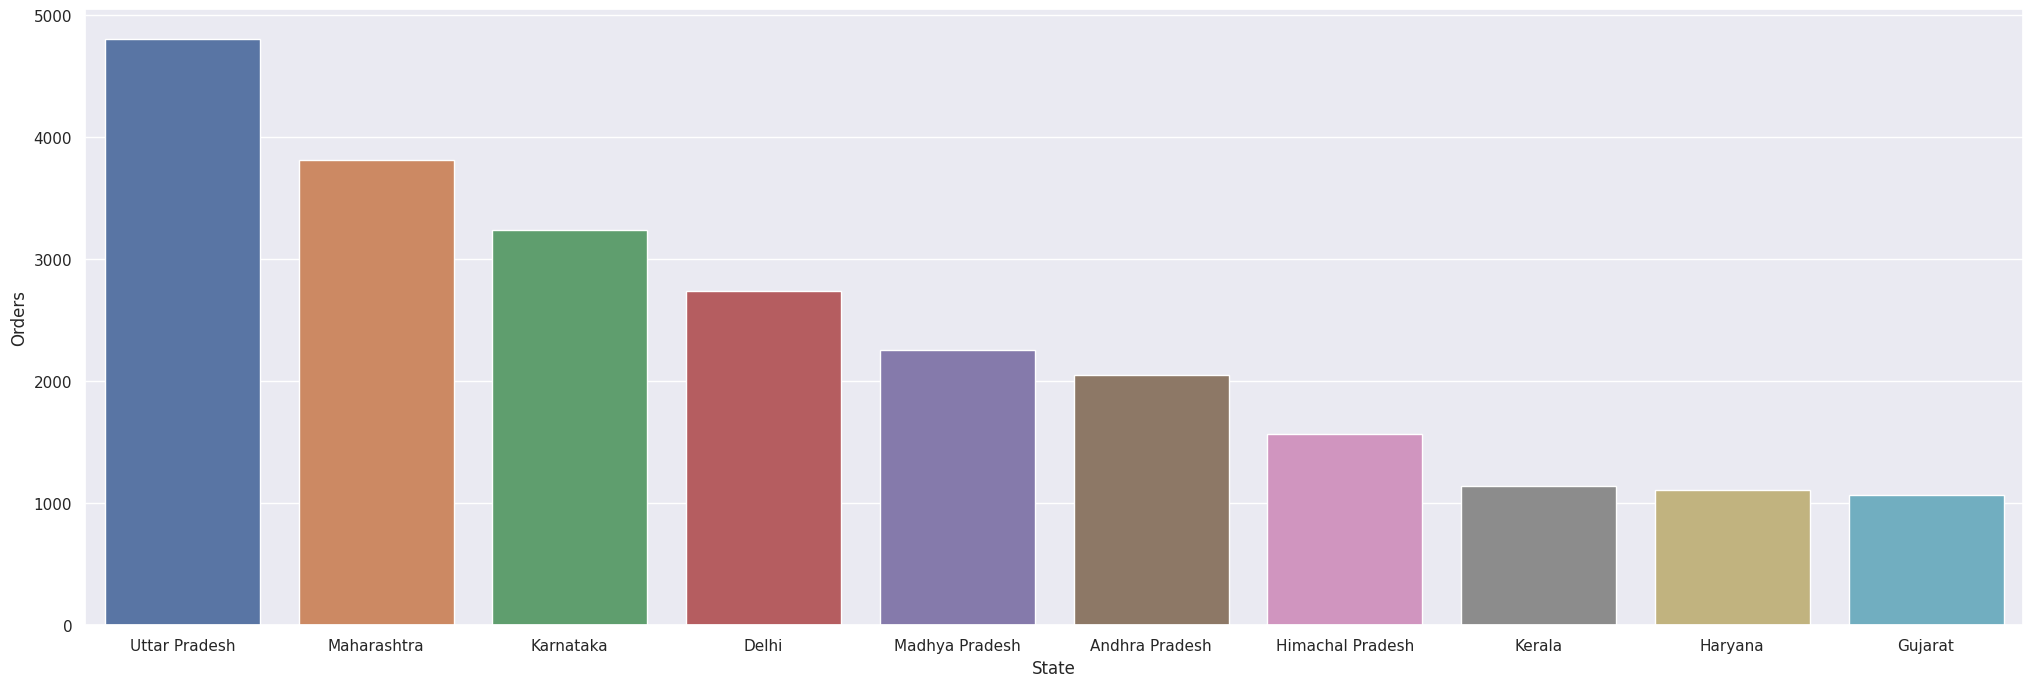

In [ ]:
sales_gen=df.groupby(["State"],as_index=False)["Orders"].sum().sort_values(by="Orders",ascending=False).head(10)
sns.set(rc={"figure.figsize":(25,8)})
sns.barplot(x="State",y="Orders",data=sales_gen)

<Axes: xlabel='State', ylabel='Amount'>

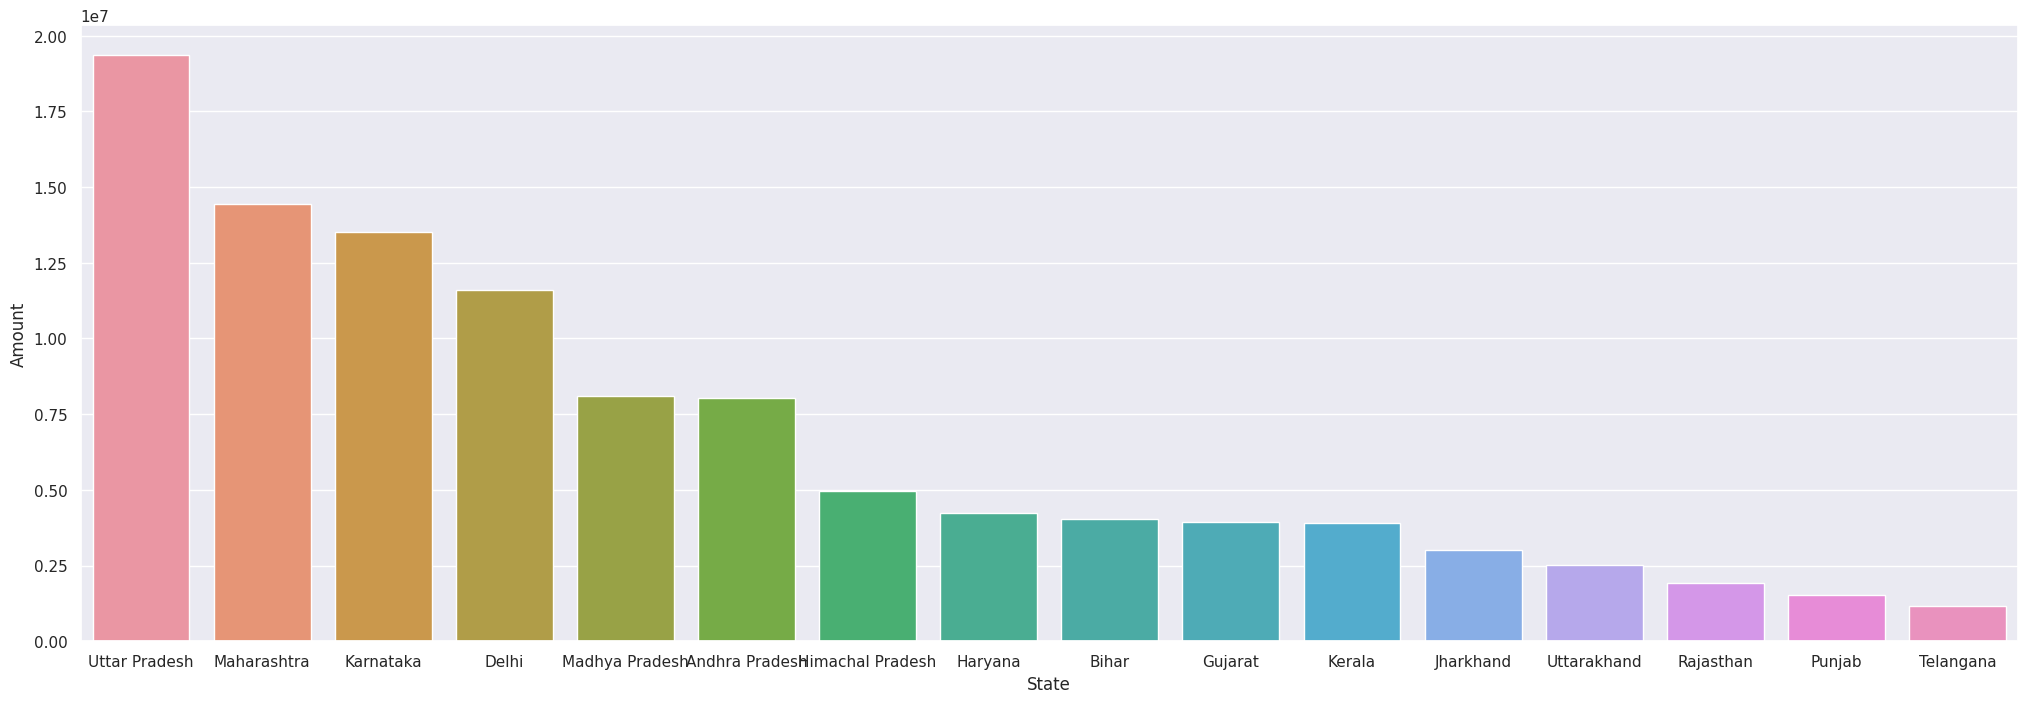

In [ ]:
sales_gen=df.groupby(["State"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)
sns.barplot(x="State",y="Amount",data=sales_gen)

In [ ]:
#3)(Most of the orders from Uttar pradehs ,Maharashtra Karnataka respectively )

<Axes: xlabel='Occupation', ylabel='count'>

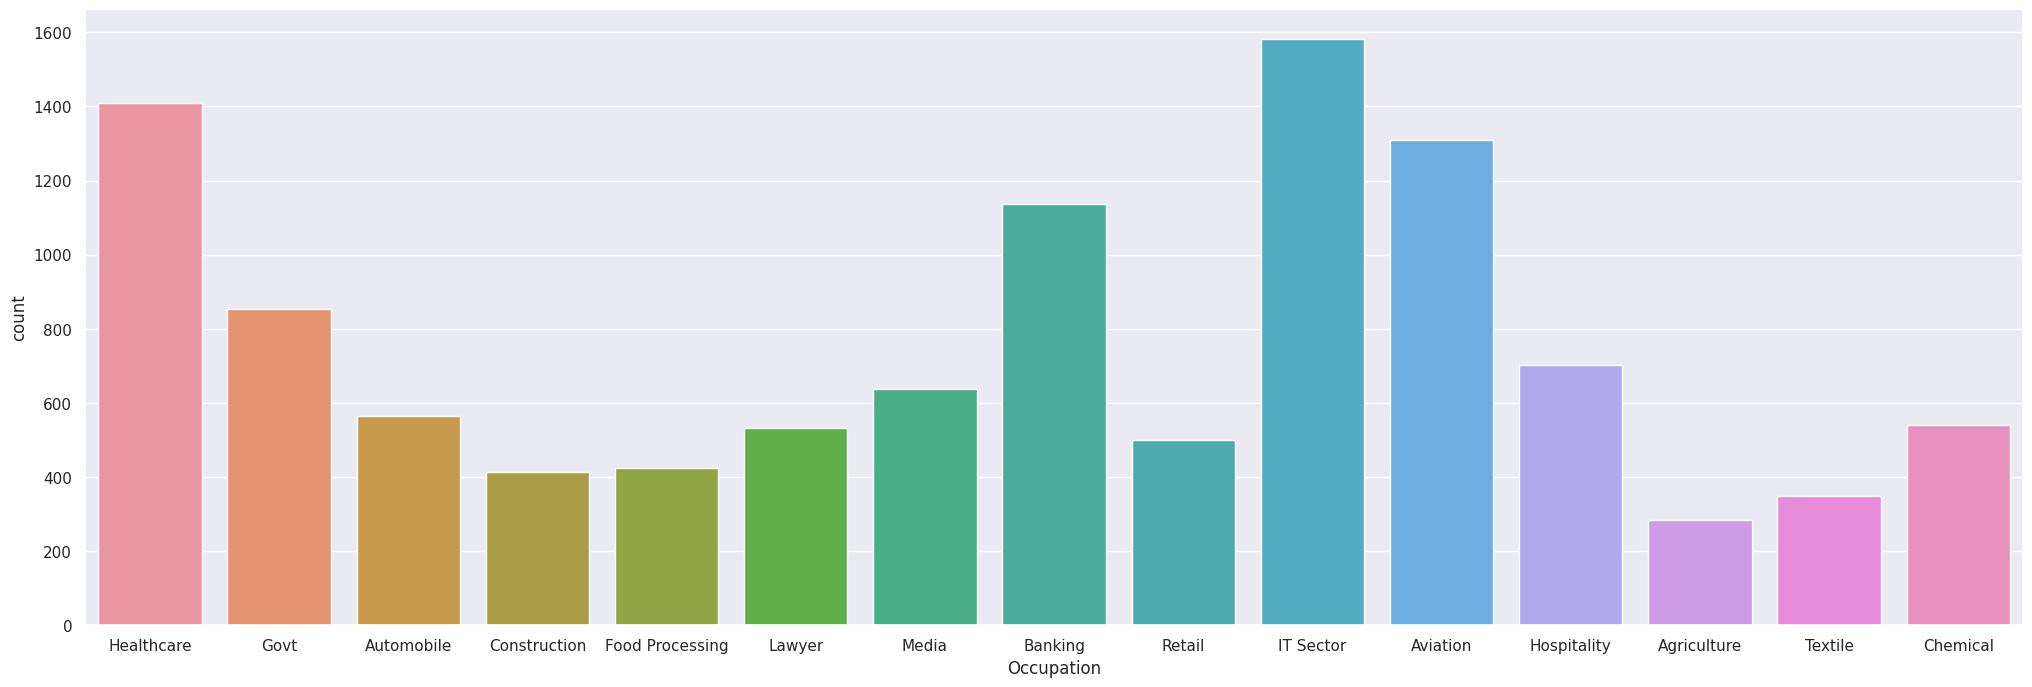

In [ ]:
sns.set(rc={"figure.figsize":(25,8)})
sns.countplot(x="Occupation",data=df)

<Axes: xlabel='Occupation', ylabel='Amount'>

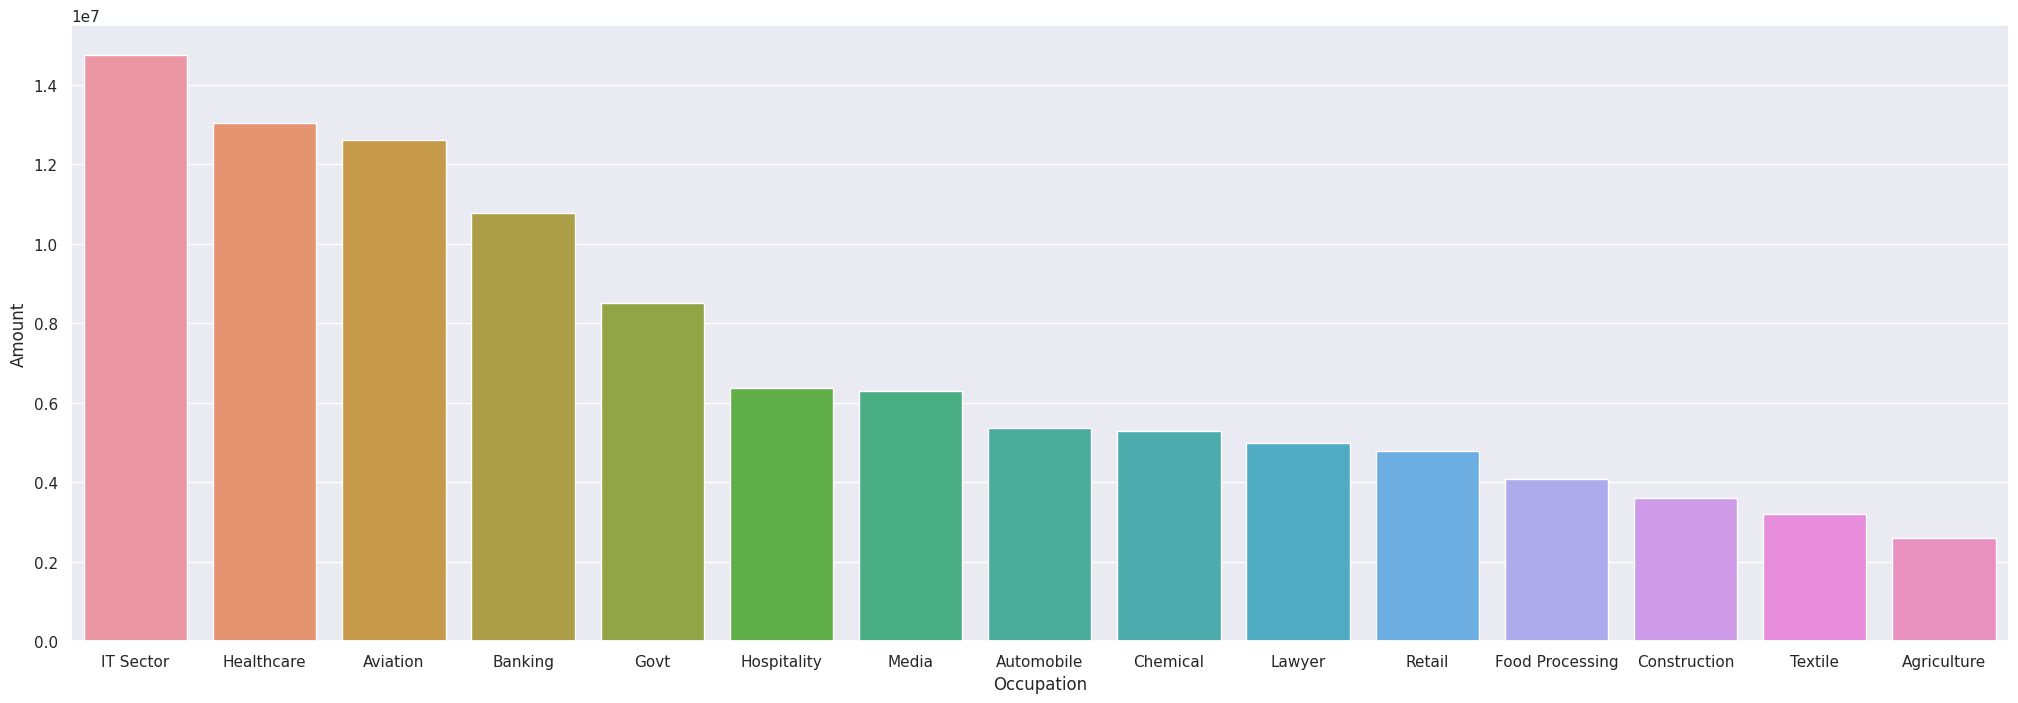

In [ ]:
sales_gen=df.groupby(["Occupation"],as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)
sns.barplot(x="Occupation",y="Amount",data=sales_gen)

In [ ]:
#4)(From above we can see that most of the buyers are working in IT,Aviation and Healthcare sectore)

<Axes: xlabel='Product_Category', ylabel='count'>

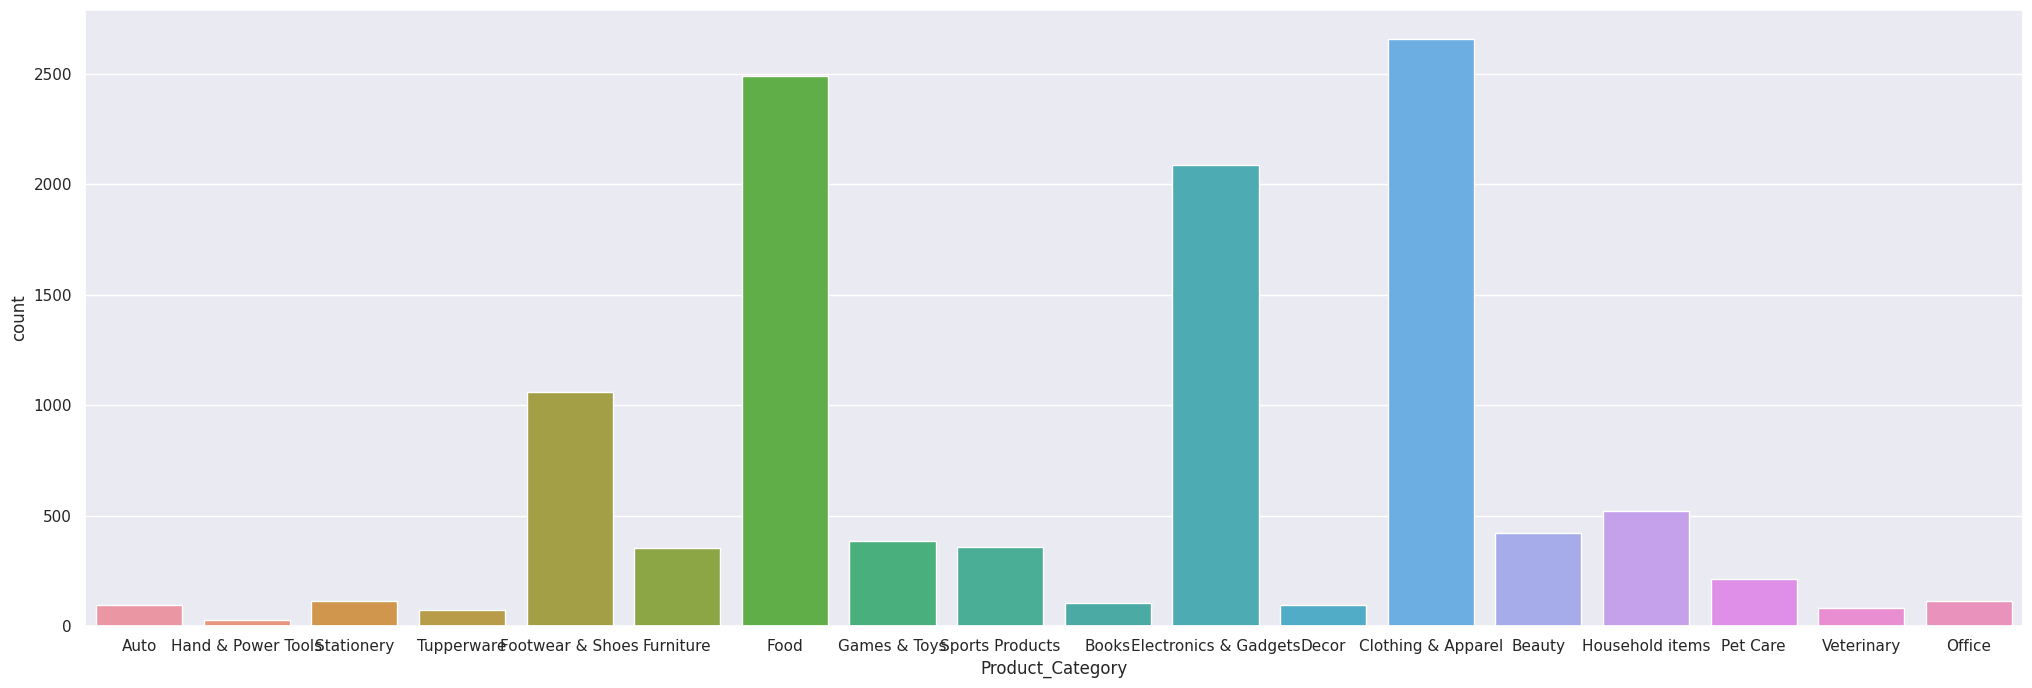

In [ ]:
sns.set(rc={"figure.figsize":(25,8)})
sns.countplot(x="Product_Category",data=df)

<Axes: xlabel='Product_Category', ylabel='Amount'>

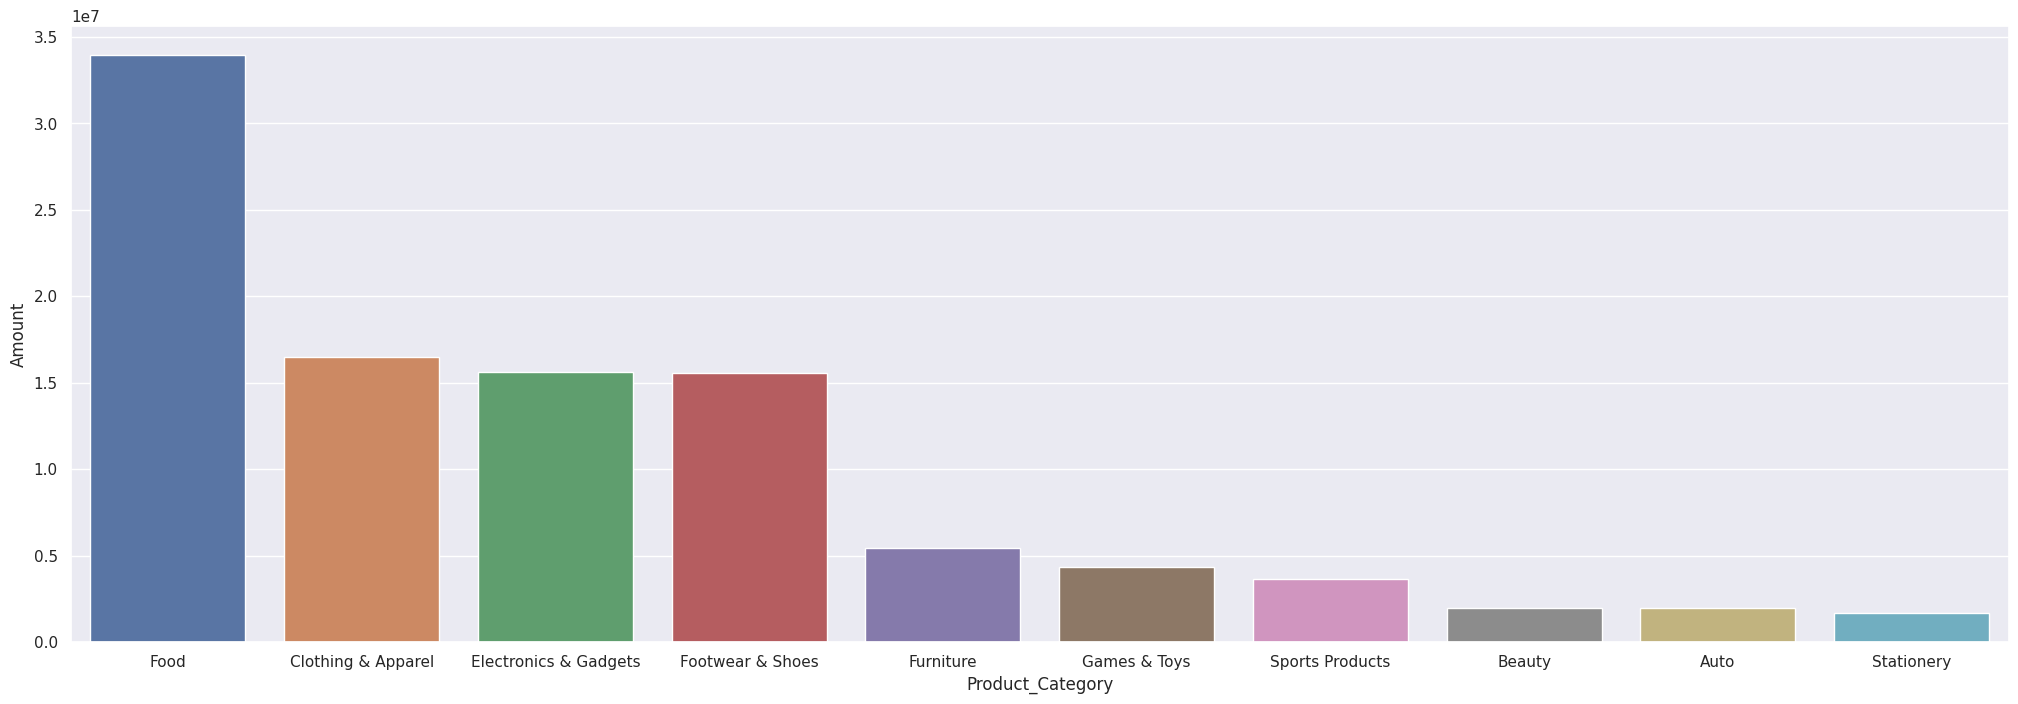

In [ ]:
sales_gen=df.groupby(["Product_Category"],as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False).head(10)
sns.barplot(x="Product_Category",y="Amount",data=sales_gen)

In [ ]:
#Conclusion:#

In [ ]:
#Women age group 26,35 yrs from UP,Maharashtra and Karnataka workinf in IT ,Healthcare and Aviation are more likely to buy product from food
#Clothing and Electronics Category!